# Анализ оттока клиентов регионального банка для принятия решения по маркетинговой кампании

Подготовлено исследование влияния клиентов на отток клиентов на основе данных регионального банка.
Проведена предобработка данных. Выявлены параметры, влияющие на отточность клиентов банка. Визуализированы полученные данные. Определены сегменты отточных клиентов.

* **Цель:**  
проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.  

* **Задача:**  
максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка.  

* **Навыки и инструменты:**  
python; pandas; seaborn; plotly; визуализация данных

## План выполнения проекта:

<a href="#раздел1">1. Загрузить данные, изучить общую информацию</a>  
<a href="#раздел2">2. Предобработка данных:</a>  
<a href="#раздел2">- Исследовать пропущенные значения;</a>  
<a href="#раздел3">- Исследовать соответствие типов и привести в соответствие типы;</a>  
<a href="#раздел4">- Исследовать дубликаты и удалить их;</a>  
<a href="#раздел5">- Проверить корректность наименований колонок и переименовать колонки;</a>  
<a href="#раздел6">- Закодировать текстовые столбцы численно: создать новые столбцы по полу (2 столбца) и городам (3 столбца)</a>  
<a href="#раздел7">3. Исследовательский анализ данных</a>  
<a href="#раздел7">- Изучить параметры данных и построить отдельные гистограммы для каждого из этих параметров. Описать наблюдения по параметрам;</a>
<a href="#раздел8">- Сравнить портреты типичных клиентов в разрезе оттока</a>
<a href="#раздел9">- Распределения непрерывных, в т.ч. в разрезе оттока</a>  
<a href="#раздел10">4. Провести корреляционный анализ</a>  
<a href="#раздел11">5. Выдвинуть и проверить статистические гипотезы</a>  
<a href="#раздел12">- Сформулировать нулевую гипотезу;</a>   
<a href="#раздел13">- Отслеживать применимость используемого стат.критерия к исследуемым данным;</a>  
<a href="#раздел14">- Выдвинуть гипотезу, исходя из сравнения типичных клиентов</a>
<a href="#раздел15">6. Подвести промежуточный итог</a>  
<a href="#раздел16">7. Сегментация на основе стратегических показателей</a>  
<a href="#раздел17">8. Подготовить выводы и рекомендации для заказчика</a>  
<a href="#раздел18">9. Подготовить презентацию в формате pdf</a>  
<a href="#раздел19">10. Построить дашборд с указанием количества клиентов в зависимости от числа используемых продуктов и уровня оттока среди владельцев данного числа продуктов, также с рапределением по городам</a>

----

<a id="раздел1"></a>

## Загрузить данные, изучить общую информацию

In [1]:
!pip install --upgrade pandas
!pip install numpy --upgrade
!pip install -U seaborn

!pip --no-input install colorama

Requirement already up-to-date: pandas in c:\__macosx\anaconda\lib\site-packages (1.3.5)
Requirement already up-to-date: numpy in c:\__macosx\anaconda\lib\site-packages (1.21.6)
Requirement already up-to-date: seaborn in c:\__macosx\anaconda\lib\site-packages (0.12.2)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import scipy.stats as st
import seaborn as sns

import math as mth

import matplotlib as mpl

import plotly.express as px
from plotly import graph_objects as go

In [3]:
data = pd.read_csv(r"C:\Users\Айза\Desktop\portfolio\bank_scrooge.csv")

In [4]:
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


<a id="раздел2"></a>

## Предобработка данных:  
* Исследовать пропущенные значения

In [7]:
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

Пропущенные значения имеются в столбцах "age" и "баланс".  
К пропускам в столбце "возраст" могли привести непредставление данных клиентами. 
Пропуски в столбце "баланс" могут быть обусловлены отсутствием данных или нулевым балансом. Замена или удаление этих данных могут исказить результаты.

In [8]:
data_nan = data[data['balance'].isna()]
data_nan

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [9]:
data_n = data.copy()
data_n = data_n.drop(columns=['gender', 'city'])

In [10]:
print(data_n['balance'].isna().corr(data_n['credit_card']))

0.15833364983328332


In [11]:
print(data_n['balance'].isna().corr(data_n['churn']))

-0.24942068102291426


In [12]:
print(data_n['balance'].isna().corr(data_n['age']))

-0.028659128814275566


In [13]:
print(data_n['balance'].isna().corr(data_n['last_activity']))

0.02836233037455207


In [14]:
print(data_n['balance'].isna().corr(data_n['products']))

-0.4875122616895684


In [15]:
print(data_n['balance'].isna().corr(data_n['equity']))

-0.7099513055156426


In [16]:
print(data_n['balance'].isna().corr(data_n['score']))

0.13887075179143477


In [17]:
print(data_n['balance'].isna().corr(data_n['EST_SALARY']))

0.30715369517170865


In [18]:
percent_churn_1_nan = (data_nan[data_nan['churn']==1]['USERID'].count()) *100 / data_nan['USERID'].count()
print('Процент отточных клиентов с пропусками в балансе:', round(percent_churn_1_nan, 2))

Процент отточных клиентов с пропусками в балансе: 0.57


In [19]:
percent_credit_card_1_nan = (data_nan[data_nan['credit_card']==1]['USERID'].count()) *100 / data_nan['USERID'].count()
print('Процент владельцев кредитных карт с пропусками в балансе:', round(percent_credit_card_1_nan, 2))

Процент владельцев кредитных карт с пропусками в балансе: 81.57


In [20]:
percent_products_nan = (data_nan[data_nan['products'] > 1]['USERID'].count()) *100 / data_nan['USERID'].count()
print('Процент использующих более одного продукта клиентов с пропусками в балансе:', round(percent_products_nan, 2))

Процент использующих более одного продукта клиентов с пропусками в балансе: 14.99


In [21]:
percent_equity_nan = (data_nan[data_nan['equity'] <= 1]['USERID'].count()) *100 / data_nan['USERID'].count()
print('Процент имеющих оценку собственности 1 и менее клиентов с пропусками в балансе:', round(percent_equity_nan, 2))

Процент имеющих оценку собственности 1 и менее клиентов с пропусками в балансе: 99.96


Наблюдается обратная связь пропусков в балансе о значениями в столбцах оценки собственности клиента и количеством используемых продуктов. Пропуски в балансе относятся к неслучайному типу (MNAR). Они зависят от данных. Отсутствующие значения в балансе зависят от значений в столбцах датасета. Пропуски в балансе присутствуют у неотточных клиентов, использующих 1 продукт, в т.ч. кредитную карту, также оценку собственности 1 и менее. Возможно у клиентов нет расчетного счета и нулевой баланс, соответственно. Поэтому пропуски в балансе не трогаем и удаляем только пропуски в age.

In [22]:
data = data.query('age >= 18')

<a id="раздел3"></a>

* Исследовать соответствие типов. Привести типы.

In [23]:
data['age']= data['age'].apply("int64")
print(data.dtypes)

USERID             int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object


C:\__MACOSX\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Возраст приводим в целые значения.

<a id="раздел4"></a>

* Проверить корректность наименований колонок и переименовать колонки

In [24]:
data.columns = data.columns.str.lower()
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


Приводим наименования столбцов к змеинному регистру

<a id="раздел5"></a>

* Исследовать дубликаты и удалить дубликаты

In [25]:
data.duplicated().sum()

0

In [26]:
data.duplicated(subset='userid').sum()

50

In [27]:
data = data.drop_duplicates(subset='userid')
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


In [28]:
df = data.copy()

Идентификатор пользователя может быть только один. Поэтому удаляем дубликаты в столбце "Идентификатор пользователя".

<a id="раздел6"></a>

* Закодировать текстовые столбцы численно: создать новые столбцы по полу (2 столбца) и городам (3 столбца)

In [29]:
df_with_g = df.copy()
df_with_gender = pd.get_dummies(df_with_g, columns = ['gender'])
df_with_gender

,userid,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М
0,183012,850.0,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,1,0
1,146556,861.0,Рыбинск,37,5,850594.33,3,1,0,86621.77,0,1,0
2,120722,892.0,Рыбинск,30,0,NaN,1,1,1,107683.34,0,1,0
3,225363,866.0,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,1,0
4,157978,730.0,Ярославль,34,5,174.00,1,1,0,67353.16,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,27,1,78144.65,1,0,1,18943.64,0,0,1
9996,139170,894.0,Ярославль,46,0,NaN,1,1,0,196898.29,0,0,1
9997,115639,903.0,Ярославль,24,0,NaN,2,1,1,108905.09,0,0,1
9998,148700,777.0,Ярославль,68,3,865457.97,3,0,1,86874.90,0,1,0


In [30]:
df_with_c = df_with_gender.copy()
df_with_city = pd.get_dummies(df_with_c, columns = ['city'])

df_with_c_g = pd.get_dummies(df_with_c, columns = ['city'], prefix = '', prefix_sep = '')
df_with_c_g

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,Ростов,Рыбинск,Ярославль
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,27,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0
9996,139170,894.0,46,0,NaN,1,1,0,196898.29,0,0,1,0,0,1
9997,115639,903.0,24,0,NaN,2,1,1,108905.09,0,0,1,0,0,1
9998,148700,777.0,68,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1


In [31]:
df = df_with_c_g

df['gender'] = data['gender']

df['city'] = data['city']

df

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,Ростов,Рыбинск,Ярославль,gender,city
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Ж,Рыбинск
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Ж,Рыбинск
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Ж,Рыбинск
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ж,Ярославль
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,М,Ярославль
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,27,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0,М,Рыбинск
9996,139170,894.0,46,0,NaN,1,1,0,196898.29,0,0,1,0,0,1,М,Ярославль
9997,115639,903.0,24,0,NaN,2,1,1,108905.09,0,0,1,0,0,1,М,Ярославль
9998,148700,777.0,68,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1,Ж,Ярославль


In [32]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,Ростов,Рыбинск,Ярославль
count,9924.000000,9924.000000,9924.000000,9924.000000,7.664000e+03,9924.000000,9924.000000,9924.000000,9.924000e+03,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000
mean,171737.158706,848.731358,42.728839,2.634522,8.282063e+05,1.871624,0.679968,0.523378,1.478802e+05,0.183293,0.499093,0.500907,0.142684,0.267432,0.589883
std,33697.419981,65.396890,12.176452,1.979371,1.984122e+06,0.793151,0.466512,0.499478,1.393583e+05,0.386926,0.500024,0.500024,0.349768,0.442642,0.491879
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142725.000000,802.000000,33.000000,0.000000,2.955266e+05,1.000000,0.000000,0.000000,7.525218e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.249277e+05,2.000000,1.000000,1.000000,1.197154e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201159.250000,900.000000,51.000000,4.000000,9.807537e+05,2.000000,1.000000,1.000000,1.746669e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df['products'].value_counts()

2    5095
1    3306
3    1029
4     474
5      19
0       1
Name: products, dtype: int64

In [34]:
df = df.query('products >= 1')

<a id="раздел7"></a>

## Исследовательский анализ данных  

### Изучить параметры:
- score —баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — приблизительная оценка собственности клиента,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — был ли клиент активен последнее время,
- est_salary — оценочная заработная плата клиента
- churn — уходит или нет  

Построить отдельные гистограммы для каждого из этих параметров. Описать наблюдения по параметрам;

In [35]:
cnt_user = df['userid'].count()
print(cnt_user)

9923


In [36]:
user_churn = df.groupby('churn')['userid'].count()
user_churn

churn
0    8105
1    1818
Name: userid, dtype: int64

In [37]:
df_user_1 = df[df['churn']==1]
cnt_user_1 = df_user_1['userid'].count()
print('количество уходящих клиентов', cnt_user_1)

part_user_1 = cnt_user_1 *100 / cnt_user
print('доля отточных клиентов:', part_user_1)

количество уходящих клиентов 1818
доля отточных клиентов: 18.32107225637408


In [38]:
df_user_0 = df[df['churn']==0]
cnt_user_0 = df_user_0['userid'].count()
print('количество остающихся клиентов', cnt_user_0)
part_user_0 = cnt_user_0 *100 / cnt_user
print('доля неотточных клиентов:', part_user_0)

количество остающихся клиентов 8105
доля неотточных клиентов: 81.67892774362592


Количество уходящих клиентов 1819  
Доля отточных клиентов: 18.32560951037679  
Количество остающихся клиентов 8107  
Доля неотточных клиентов: 81.6743904896232  

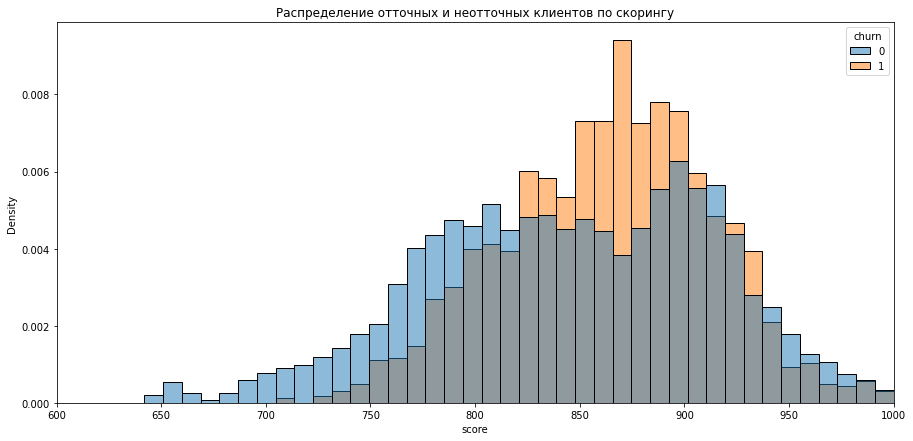

In [39]:
plt.figure(figsize=(15, 7)) 
sns.histplot(data=df, x='score', hue='churn', stat='density', common_norm=False)
plt.xlim(600, 1000)
plt.title("Распределение отточных и неотточных клиентов по скорингу")
plt.show();

Наиболее отточными определяем клиентов со скорингом от 825 до 910, от 920 до 945

In [40]:
# находим среднее значение МРОТ по городам
mrot_rostov = 15350
mrot_yaroslavl = 13890
mrot_rybinsk = 13890
avg_mrot = (mrot_rostov + mrot_yaroslavl + mrot_rybinsk) / 3
print(avg_mrot)

14376.666666666666


In [41]:
# исключаем значения меньше среднего МРОТ, т.к оценочная заработная плата клиента не может быть меньше МРОТ
df = df.query('est_salary >= @avg_mrot')

In [42]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,Ростов,Рыбинск,Ярославль
count,9872.000000,9872.000000,9872.000000,9872.000000,7.613000e+03,9872.000000,9872.000000,9872.000000,9.872000e+03,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000
mean,171689.330024,848.853829,42.712419,2.631888,8.320271e+05,1.870746,0.679903,0.523197,1.486017e+05,0.183955,0.498177,0.501823,0.141815,0.266714,0.591471
std,33703.356043,65.415967,12.096263,1.980154,1.990105e+06,0.792470,0.466537,0.499487,1.393687e+05,0.387467,0.500022,0.500022,0.348878,0.442264,0.491587
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.438068e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142571.500000,802.000000,33.000000,0.000000,2.980917e+05,1.000000,0.000000,0.000000,7.598762e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172548.000000,853.000000,40.000000,3.000000,5.275428e+05,2.000000,1.000000,1.000000,1.201045e+05,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,201136.500000,900.000000,51.000000,4.000000,9.839446e+05,2.000000,1.000000,1.000000,1.749720e+05,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Максимальные значения баланса и оценочной заработной платы клиента не трогаем, т.к. это могут быть состоятельные клиенты.

In [43]:
city = pd.DataFrame()
city['users_cnt'] = df.groupby('churn')['userid'].count()
city['rostov_users_cnt'] = df.query('Ростов == 1').groupby('churn')['userid'].count()
city['rybinsk_users_cnt'] = df.query('Рыбинск == 1').groupby('churn')['userid'].count()
city['yaroslavl_users_cnt'] = df.query('Ярославль == 1').groupby('churn')['userid'].count()

#количество отточных клиентов по городам
rostov_users_cnt_1 = df.query('Ростов == 1 and churn == 1')['userid'].count()
rybinsk_users_cnt_1 = df.query('Рыбинск == 1 and churn == 1')['userid'].count()
yaroslavl_users_cnt_1 = df.query('Ярославль == 1 and churn == 1')['userid'].count()

#количество всех клиентов по городам
rostov_users_cnt_all = df.query('Ростов == 1')['userid'].count()
rybinsk_users_cnt_all = df.query('Рыбинск == 1')['userid'].count()
yaroslavl_users_cnt_all = df.query('Ярославль == 1')['userid'].count()

#находим долю отточных и неотточных клиентов по городам
city['rostov_share'] = 100*(city['rostov_users_cnt'] / rostov_users_cnt_all)
city['rybinsk_share'] = 100*(city['rybinsk_users_cnt'] / rybinsk_users_cnt_all)
city['yaroslavl_share'] = 100*(city['yaroslavl_users_cnt'] / yaroslavl_users_cnt_all)

display(city)

,users_cnt,rostov_users_cnt,rybinsk_users_cnt,yaroslavl_users_cnt,rostov_share,rybinsk_share,yaroslavl_share
churn,,,,,,,
0,8056,1137,2197,4722,81.214286,83.440942,80.870012
1,1816,263,436,1117,18.785714,16.559058,19.129988


In [44]:
#отточность клиентов по городам
df.pivot_table(index='city',values='churn')

,churn
city,
Ростов,0.187857
Рыбинск,0.165591
Ярославль,0.191300


In [45]:
city2 = pd.DataFrame()
city2['users_cnt'] = data.groupby('city')['userid'].count()

#количество отточных клиентов по городам
city2['city_users_cnt_1'] = data.query('churn == 1').groupby('city')['userid'].count()

#находим долю отточных и неотточных клиентов по городам
city2['share_1'] = round(100*(city2['city_users_cnt_1'] / city2['users_cnt']), 1)

#количество отточных клиентов по городам
city2['city_users_cnt_0'] = data.query('churn == 0').groupby('city')['userid'].count()

#находим долю отточных и неотточных клиентов по городам
city2['share_0'] = round(100*(city2['city_users_cnt_0'] / city2['users_cnt']), 1)

display(city2)

,users_cnt,city_users_cnt_1,share_1,city_users_cnt_0,share_0
city,,,,,
Ростов,1416,265,18.7,1151,81.3
Рыбинск,2654,437,16.5,2217,83.5
Ярославль,5854,1117,19.1,4737,80.9


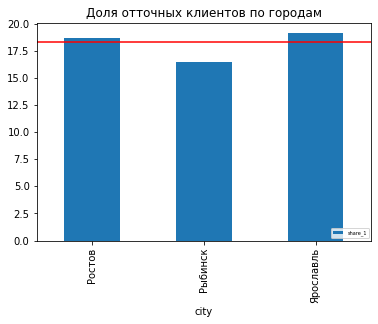

In [46]:
city2.pivot_table(index='city', values='share_1', aggfunc='mean').plot(y='share_1', kind='bar')
plt.axhline(y=part_user_1, color='r')
plt.title('Доля отточных клиентов по городам')
plt.legend(loc='lower right', fontsize=5);

Доля отточных клиентов выше среднего уровня отточности в Ярославле и Ростове. Наибольшая доля отточных клиентов в Ярославле (на 4,4% выше средней). Доля отточности меньше средней доли отточности в Рыбинске (на 9,8%).

In [47]:
gender_df = pd.pivot_table(data, aggfunc = 'count', index = 'gender', values = 'userid')
gender_df['churn_1'] = df.query('churn == 1').groupby('gender')['userid'].count()
gender_df['churn_0'] = df.query('churn == 0').groupby('gender')['userid'].count()

In [48]:
gender_df['share_1'] = round((gender_df['churn_1']/gender_df['userid']*100), 1)
gender_df['share_0'] = round((gender_df['churn_0']/gender_df['userid']*100), 1)
display(gender_df)

,userid,churn_1,churn_0,share_1,share_0
gender,,,,,
Ж,4953,634,4284,12.8,86.5
М,4971,1182,3772,23.8,75.9


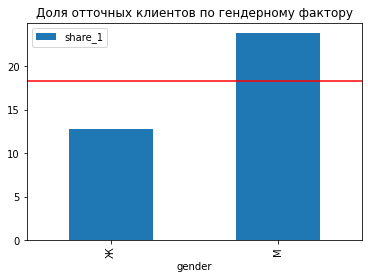

In [49]:
gender_df.pivot_table(index='gender', values='share_1', aggfunc='mean').plot(y='share_1', kind='bar')
plt.axhline(y=part_user_1, color='r')
plt.title('Доля отточных клиентов по гендерному фактору');

Доля отточных клиентов среди мужчин почти в 2 раза больше, чем среди женщин. Доля отточности мужчин на 30% больше среднего уровня отточности. Доля отточности женщин на 30% меньше среднего уровня отточности.

In [50]:
age_df = pd.pivot_table(df, aggfunc = 'count', index = 'age', values = 'userid')

age_df['u_churn_1'] = df.query('churn == 1').groupby('age')['userid'].count()
age_df['share_1'] = round((age_df['u_churn_1'] / age_df['userid'] * 100),1)
age_df_higher = age_df.query('share_1 >= 18.3')
display(age_df_higher.sort_values(by='share_1', ascending=False))

,userid,u_churn_1,share_1
age,,,
54,138,47.0,34.1
52,153,50.0,32.7
56,148,47.0,31.8
27,170,53.0,31.2
21,13,4.0,30.8
58,169,51.0,30.2
55,164,46.0,28.0
29,232,62.0,26.7
57,159,42.0,26.4


Уровень оттока выше у клиентов, возраст которых 54, 52, 56, 27, 21, 58, 55, 29, 57. 59, 26, 34, 53, 25, 28, 51, 60, 31, 32, 30, 50, 35, 37, 33, 46, 38.
Исходя из этого, можем выделить промежутки возрастной категории наиболее отточных клиентов: 25-35 лет, а 50-60 лет.

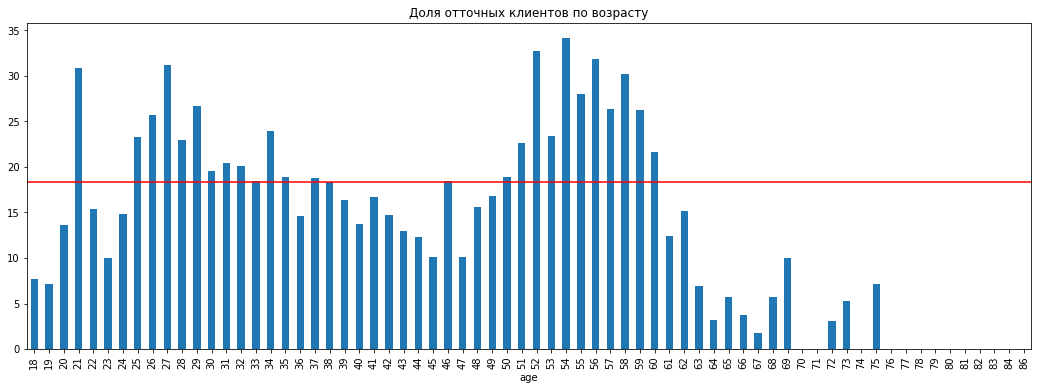

In [51]:
age_df['share_1'].plot(kind='bar', figsize=(18, 6))
plt.axhline(y=part_user_1, color='r')
plt.xticks(rotation=90)
plt.title('Доля отточных клиентов по возрасту')
plt.show();

In [52]:
df['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9], dtype=int64)

,userid,u_churn_1,share
equity,,,
0,2551,90,3.5
1,764,93,12.2
2,1036,166,16.0
3,1521,319,21.0
4,1832,464,25.3
5,1903,576,30.3
6,158,58,36.7
7,77,37,48.1
8,17,6,35.3


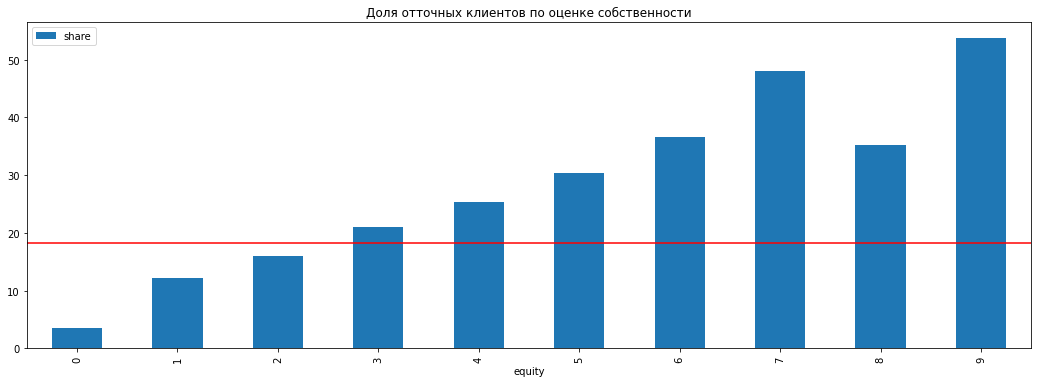

In [53]:
equity_df = pd.pivot_table(df, aggfunc = 'count', index = 'equity', values = 'userid')

equity_df['u_churn_1'] = df.query('churn == 1').groupby('equity')['userid'].count()
equity_df['share'] = round((equity_df['u_churn_1'] / equity_df['userid'] * 100),1)
display(equity_df)
equity_df.plot(y='share', kind='bar', figsize=(18,6))
plt.axhline(y=part_user_1, color='r')
plt.title('Доля отточных клиентов по оценке собственности');

Наиболее отточными являются клиенты, приблизительная оценка собственности которых больше 3. Выбираем от 3, т.к. показатель доли отточных клиентов по оценке собственности выше средней отточности всех клиентов.

Доля отточных клиентов с приблизительной оценкой собственности от 3 до 7 продуктов выше, чем доля неотточных.

Доля отточных клиентов с оценкой собственности 3 выше среднего уровня отточности на 14,7%;  
доля отточных клиентов с оценкой собственности 4 выше среднего уровня отточности на 38,2%;  
доля отточных клиентов с оценкой собственности 5 выше среднего уровня отточности на 65,6%;  
доля отточных клиентов с оценкой собственности 6 в 2 раза выше среднего уровня отточности;  
доля отточных клиентов с оценкой собственности 7 в 2,6 раза выше среднего уровня отточности;  
доля отточных клиентов с оценкой собственности 8 в 1,9 раза выше среднего уровня отточности;  
доля отточных клиентов с оценкой собственности 9 в 2,9 раза выше среднего уровня отточности.

In [54]:
balance_df = pd.pivot_table(df, aggfunc = 'mean', index = 'churn', values = 'balance')

In [55]:
balance_df['median_balance'] = pd.pivot_table(df, aggfunc = 'median', index = 'churn', values = 'balance')
balance_df['max_balance'] = pd.pivot_table(df, aggfunc = 'max', index = 'churn', values = 'balance')

balance_df

,balance,median_balance,max_balance
churn,,,
0,7.377857e+05,477562.060,1.191136e+08
1,1.135491e+06,786159.255,6.486621e+07


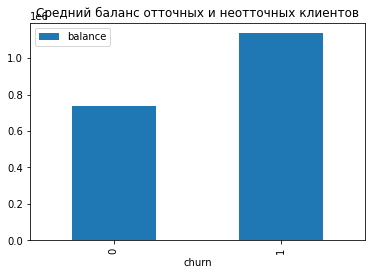

In [56]:
balance_df = pd.pivot_table(df, aggfunc = 'mean', index = 'churn', values = 'balance').plot(y='balance', kind='bar')

plt.title('Средний баланс отточных и неотточных клиентов');

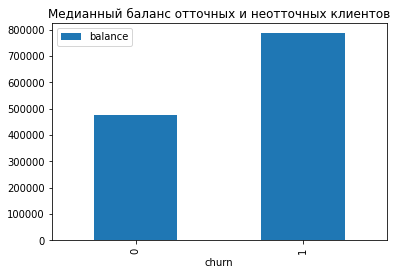

In [57]:
balance_df = pd.pivot_table(df, aggfunc = 'median', index = 'churn', values = 'balance').plot(y='balance', kind='bar')
plt.title('Медианный баланс отточных и неотточных клиентов');

Средний баланс отточных клиентов выше, чем у неооточных клиентов. оверяем медианному балансу, т.к. есть баланс VIP-клиентов.

,userid,u_churn_1,share
products,,,
1,3293,234,7.1
2,5070,977,19.3
3,1020,297,29.1
4,470,300,63.8
5,19,8,42.1


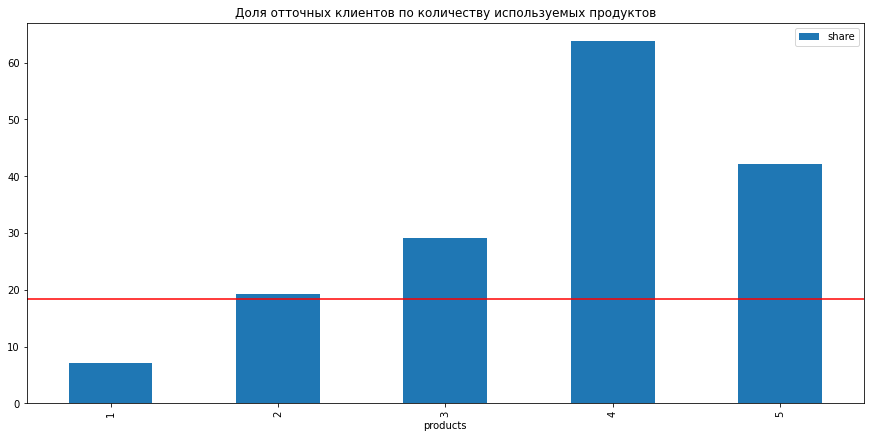

In [58]:
products_df = pd.pivot_table(df, aggfunc = 'count', index = 'products', values = 'userid')

products_df['u_churn_1'] = df.query('churn == 1').groupby('products')['userid'].count()
products_df['share'] = round((products_df['u_churn_1'] / products_df['userid'] * 100),1)
display(products_df)
products_df.plot(y='share', kind='bar', figsize=(15, 7))
plt.axhline(y=part_user_1, color='r')
plt.title('Доля отточных клиентов по количеству используемых продуктов');

Наиболее отточными клиентами являются клиенты, которые используют:  
4 продукта - 63,8%;  
5 продуктов - 42,1%;  
3 продукта - 29,1%;  
2 продукта - 19,3%.  
Высока доля неотточных клиентов, которые используют 1 продукт (92,9%)

Наиболее высокая доля отточных клиентов среди клиентов, которые пользуются 4 продуктами. Доля отточных клиентов больше доли неотточных среди клиентов, которые используют больше 2 продуктов

,userid,churn_1,share
credit_card,,,
0,3160,815,25.8
1,6712,1001,14.9


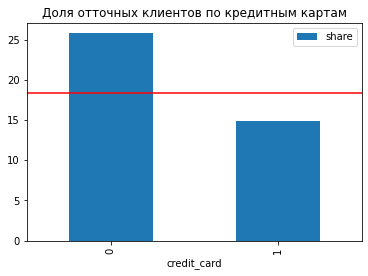

In [59]:
credit_card_df = pd.pivot_table(df, aggfunc = 'count', index = 'credit_card', values = 'userid')
credit_card_df['churn_1'] = df.query('churn == 1').groupby('credit_card')['userid'].count()
credit_card_df['share'] = round((credit_card_df['churn_1']/credit_card_df['userid']*100), 1)
display(credit_card_df)
credit_card_df.pivot_table(index='credit_card', values='share', aggfunc='mean').plot(y='share', kind='bar')
plt.axhline(y=part_user_1, color='r')
plt.title('Доля отточных клиентов по кредитным картам');

Доля отточных клиентов без кредитных карт выше, чем клиентов с кредитными картами. Доля отточных клиентов без кредитных карт выше на 41% среднего уровня отточных клиентов.

,userid,churn_1,share
last_activity,,,
0,4707,540,11.5
1,5165,1276,24.7


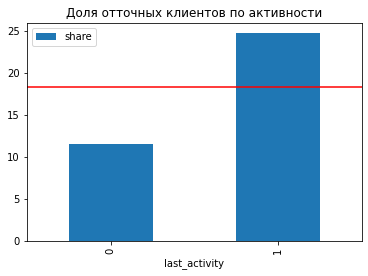

In [60]:
last_activity_df = pd.pivot_table(df, aggfunc = 'count', index = 'last_activity', values = 'userid')
last_activity_df['churn_1'] = df.query('churn == 1').groupby('last_activity')['userid'].count()
last_activity_df['share'] = round((last_activity_df['churn_1']/last_activity_df['userid']*100), 1)
display(last_activity_df)
last_activity_df.pivot_table(index='last_activity', values='share', aggfunc='mean').plot(y='share', kind='bar')
plt.axhline(y=part_user_1, color='r')
plt.title('Доля отточных клиентов по активности');

Среди клиентов, которые были активны в последнее время, гораздо больше отточных клиентов. Доля отточности активных клиентов на 35% больше средней доли отточных клиентов.

<a id="раздел8"></a>

### Сравнить портреты типичных клиентов (средние и медианы)

,score
churn,
0,845.587140
1,863.345264


score    848.853829
dtype: float64

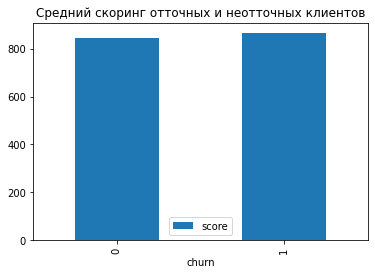

In [61]:
cnt_users_score = df.pivot_table(index='churn',values='score',aggfunc='mean')
display(cnt_users_score)
cnt_users_score.plot(y='score', kind='bar', title='Средний скоринг отточных и неотточных клиентов');
avg_score_churn_all = df.agg({"score":"mean"})
avg_score_churn_all

Максимальный скоринг у большинства отточных клиентов выше, чем у клиентов, которые остаются, и составляет 863, а у тех, кто остается, составляет 845. Средний скоринг по всем клиентам 848. Скоринг отточных клиентов на 1,7 % больше среднего значения скоринга и на 2,1% больше скоринга неотточных клиентов.

,balance,median_balance
churn,,
0,7.377857e+05,477562.060
1,1.135491e+06,786159.255


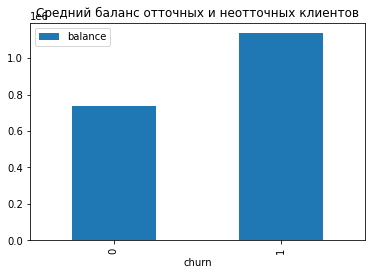

In [62]:
balance_df = pd.pivot_table(df, aggfunc = 'mean', index = 'churn', values = 'balance')
balance_df['median_balance'] = pd.pivot_table(df, aggfunc = 'median', index = 'churn', values = 'balance')
display(balance_df)
balance_df.plot(y='balance', kind='bar')

plt.title('Средний баланс отточных и неотточных клиентов');

Средний баланс неотточных клиентов 532802, средний баланс отточных клиентов 1127529, что в 2 раза больше баланса неотточных клиентов.  
Медианный баланс неотточных клиентов 323020, средний баланс отточных клиентов 775434, что в 2,4 раза больше баланса неотточных клиентов.  

In [63]:
pro_churn_cnt = df.groupby(['products', 'churn'])['userid'].count()
pro_churn_cnt.name = 'cnt'
pro_churn_cnt = pro_churn_cnt.reset_index()
pro_churn_cnt.sort_values('cnt', ascending=False)
pro_churn_cnt

,products,churn,cnt
0,1,0,3059
1,1,1,234
2,2,0,4093
3,2,1,977
4,3,0,723
5,3,1,297
6,4,0,170
7,4,1,300
8,5,0,11
9,5,1,8


,est_salary,median_est_salary,max_est_salary
churn,,,
0,148623.019585,118775.690,1395064.45
1,148507.013265,125609.685,1263028.49


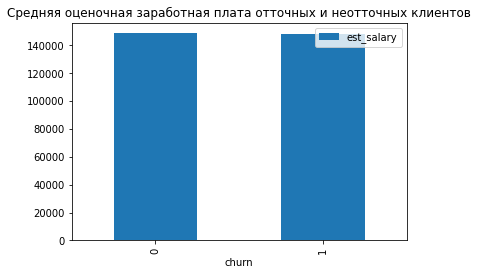

In [64]:
est_salary_df = pd.pivot_table(df, aggfunc = 'mean', index = 'churn', values = 'est_salary')
est_salary_df['median_est_salary'] = pd.pivot_table(df, aggfunc = 'median', index = 'churn', values = 'est_salary')
est_salary_df['max_est_salary'] = pd.pivot_table(df, aggfunc = 'max', index = 'churn', values = 'est_salary')

display(est_salary_df)

est_salary_df = pd.pivot_table(df, aggfunc = 'mean', index = 'churn', values = 'est_salary').plot(y='est_salary', kind='bar')
plt.title('Средняя оценочная заработная плата отточных и неотточных клиентов');

Средная оценочная заработная плата отточных клиентов и у неотточных клентов примерно одинаковая. Медианная оценочная заработная плата отточных клиентов на 5,3% выше, чем у неотточных клентов.

* *Сравнение средних*

Максимальный скоринг у большинства отточных клиентов выше, чем у клиентов, которые остаются, и составляет 863, а у тех, кто остается, составляет 845. Средний скоринг по всем клиентам 848. Скоринг отточных клиентов на 1,7 % больше среднего значения скоринга и на 2,1% больше скоринга неотточных клиентов.  Медианный скоринг практически не отличается от среднего скоринга. Медианный скоринг отточных клиентов на 2% выше скоринга неотточных клиентов.  

Средний возраст отточных клиентов на 3,8 % младше возраста неотточных клиентов. Средний возраст отточных клиентов составляет 41 год, а неотточных почти 43 года. Медианный возраст отточных клиентов практически такой же как у неотточных клиентов (на год старше).   

Средний баланс неотточных клиентов 532802, средний баланс отточных клиентов 1127529, что в 2 раза (на 52,7%) больше баланса неотточных клиентов.  
Медианный баланс неотточных клиентов 323020, средний баланс отточных клиентов 775434, что в 2,4 раза (58,3%) больше баланса неотточных клиентов.  
Средная оценочная заработная плата отточных клиентов и у неотточных клентов примерно одинаковая. Медианная оценочная заработная плата отточных клиентов на 5,3% выше, чем у неотточных клентов.  

Количество отточных клиентов из Ярославля в 4,2 раза (332,7%) меньше количества неотточных клиентов из Ярославля.  
Количество отточных клиентов из Рыбинска в 5,1 раза (407,3%) меньше количества неотточных клиентов из Рыбинска.  
Количество отточных клиентов из Ростова в 4,3 раза (324,3%) меньше количества неотточных клиентов из Ростова.   
Высока вероятность, что неотточный клиент из Рыбинска, а отточный из Ярославля.  
Количество отточных клиентов женского пола в 6,7 раза (574,8%) меньше количества неотточных клиентов женского пола, количество отточных клиентов мужского пола 3,2 раза (219,2%) меньше количества неотточных клиентов мужского пола.  
Высока вероятность, что отточный клиент мужского пола.
Количество отточных клиентов с оценкой собственности 0 в 27 раз (на 2634%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 1 в 7 раз (на 623%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 2 в 5 раз (на 424%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 3 в 3 раза (на 277%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 4 в 4 раза (на 195%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 5 в 3 раза (на 130%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 6 в 1,7 раза (на 72%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 7 на 8% меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 8 в 1,8 раза (на 83%) меньше количества неотточных;  
Количество отточных клиентов с оценкой собственности 9  на 14% больше количества неотточных.  

Количество отточных клиентов, которые используют 1 продукт, в 13 раз (на 1207%) меньше количества клиентов, которые используют 1 продукт;
Количество отточных клиентов, которые используют 2 продукта, в 4,2 раз (на 319%) меньше количества клиентов, которые используют 2 продукта;
Количество отточных клиентов, которые используют 3 продукта, в 2,4 раз (на 143%) меньше количества клиентов, которые используют 3 продукта;
Количество отточных клиентов, которые используют 4 продукта, в 1,8 раза (на 43%) больше количества клиентов, которые используют 4 продукта;
Количество отточных клиентов, которые используют 5 продуктов, на 37% (3 клиента) меньше количества клиентов, которые используют 5 продуктов. Высока вероятность, что типичным отточным клиентом является клиент, который пользуется 4 продуктами.

Количество отточных клиентов с кредитной картой в 5,7 раза (на 470%) меньше количества неоттоных клиентов с кредитной картой. Количество отточных клиентов без кредитной карты в 2,9 раза (187,5%) меньше количества неоттоных клиентов без кредитной карты. 

Количество активных отточных клиентов в 3 раза (на 205%) меньше количества активных неотточных клиентов. Количество неактивных отточных клиентов в 7,7 раза (на 671%) меньше количества неактивных неотточных клиентов.  

Средная оценочная заработная плата отточных клиентов и у неотточных клентов примерно одинаковая. Медианная оценочная заработная плата отточных клиентов на 5,3% выше, чем у неотточных клентов.


In [65]:
mean_table = df.pivot_table(values=['score', 'balance', 'est_salary', 'age', 'equity', 'products'], index='churn', aggfunc = 'mean')
mean_table

,age,balance,equity,est_salary,products,score
churn,,,,,,
0,42.998883,7.377857e+05,2.376614,148623.019585,1.756331,845.587140
1,41.441630,1.135491e+06,3.764317,148507.013265,2.378304,863.345264


In [66]:
mean_table = mean_table.T
mean_table = mean_table.rename(columns = {0: 'churn_0', 1: 'churn_1'})
mean_table

churn,churn_0,churn_1
age,42.998883,4.144163e+01
balance,737785.651975,1.135491e+06
equity,2.376614,3.764317e+00
est_salary,148623.019585,1.485070e+05
products,1.756331,2.378304e+00
score,845.587140,8.633453e+02


In [67]:
mean_table['difference'] = mean_table['churn_1'] - mean_table['churn_0']
mean_table['percent'] = (mean_table['churn_1'] * 100 / mean_table['churn_0']) - 100
mean_table

churn,churn_0,churn_1,difference,percent
age,42.998883,4.144163e+01,-1.557253,-3.621612
balance,737785.651975,1.135491e+06,397705.053763,53.905230
equity,2.376614,3.764317e+00,1.387703,58.389947
est_salary,148623.019585,1.485070e+05,-116.006320,-0.078054
products,1.756331,2.378304e+00,0.621973,35.413222
score,845.587140,8.633453e+02,17.758124,2.100094


Отточные клиенты на 3 процента младше неотточных клиентов, Баланс отточных клиентов на 53,9% больше баланса неотточных, оценка собственности отточных клиентов на 58,4% выше оценки собственности неотточных клиентов, оценочная заработная плата отточных клиентов на 0,8% меньше заработной платы неотточных клиентов, количество используемых продуктов отточных клиентов на 35,4% больше количества продуктов неотточных, скоринг отточных клиентов на 2,1% больше чем у неотточных.

* *Доли оттока*

На основании вышеизложенного мы знаем, что количество отточных клиентов 1820 человек, а неооточных 8107 человек. Доля отточных клиентов составляет 18,3 %, а неотточных 81,6%. Доля отточных клиентов в 4,5 раза меньше доли неотточных клиентов.  


Доля отточных клиентов больше в Ярославле (19,1%). Не сильно отличается доля отточных клиентов в Ростове (18,8%). Доля отточных клиентов меньше всего в Рыбинске (16,5%). Доля отточных клиентов в Ярославле и Ростове в 4 раза меньше доли неотточных клиентов, в Рыбинске доля отточных клиентов в 5 раз больше доли неотточных клиентов.  

Доля отточных клиентов среди мужчин 23,8%, доля отточных клиентов среди женщин 12,8%.
Доля отточных клиентов среди мужчин почти в 2 раза больше чем доля отточных клиентов среди женщин. Доля неотточных клиентов среди женщин (86,5%) почти в 7 раз больше доли отточных клиентов среди женщин. Доля неотточных клиентов среди мужчин (75,9%) в 3 раза больше доли отточных клиентов среди женщин. 

Наиболее отточными являются клиенты, приблизительная оценка собственности которых больше 3. 

Отточных клиентов с приблизительной оценкой собственности от 5  в два раза меньше, чем неотточных. Доля отточных клиентов с приблизительной оценкой собственности от 6 в два раза больше средней доли отточности клиентов.

Наиболее отточными клиентами являются клиенты, которые используют:  
4 продукта - 63,8%;  
5 продуктов - 42,1%;  
3 продукта - 29,1%;  
2 продукта - 19,3%.  
Высока доля неотточных клиентов, которые используют 1 продукт -  92,9%

Доля отточных клиентов с кредитными картами составляет 25,8%, что в 2,9 раза больше доли неотточных клиентов с кредитными картами (74,2%). Доля отточных клиентов без кредитных карт составляет 14,9%, что в 5,7 раза больше доли неотточных клиентов без кредитных карт (85,1%). 

Доля отточных клиентов с оценкой собственности 3 выше среднего уровня отточности на 14,7%;
доля отточных клиентов с оценкой собственности 4 выше среднего уровня отточности на 38,2%;
доля отточных клиентов с оценкой собственности 5 выше среднего уровня отточности на 65,6%;
доля отточных клиентов с оценкой собственности 6 в 2 раза выше среднего уровня отточности;
доля отточных клиентов с оценкой собственности 7 в 2,6 раза выше среднего уровня отточности;
доля отточных клиентов с оценкой собственности 8 в 1,9 раза выше среднего уровня отточности;
доля отточных клиентов с оценкой собственности 9 в 2,9 раза выше среднего уровня отточности.

<a id="раздел9"></a>

### Распределения непрерывных, в т.ч. в разрезе оттока

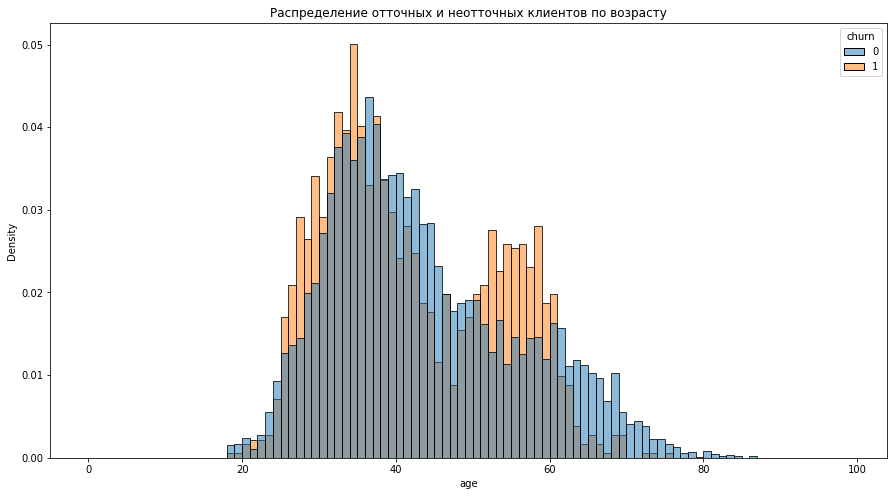

In [68]:
plt.figure(figsize=(15, 8))
sns.histplot(x='age', data=df, bins = range(0,100), hue='churn', stat='density', common_norm=False)
plt.kde = True
plt.title("Распределение отточных и неотточных клиентов по возрасту")
plt.show();

Наибольшее количество отточных клиентов наблюдаются в районе от 27 до 36 лет и от 50 до 60 лет. 

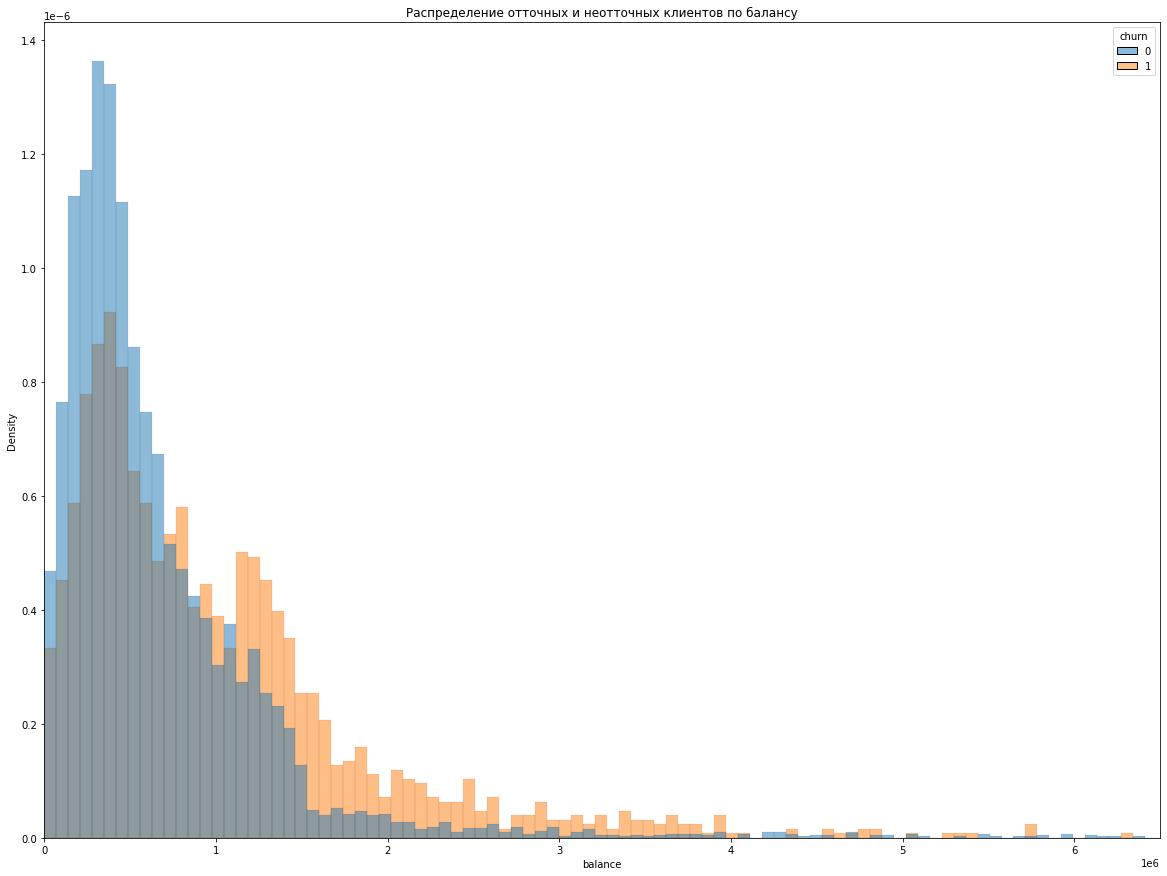

In [69]:
plt.figure(figsize=(20, 15))
sns.histplot(data=df, x='balance', hue='churn', stat='density', common_norm=False)
plt.xlim(0, 6500000)
plt.title("Распределение отточных и неотточных клиентов по балансу")
plt.show();

Баланс отточных клиентов примерно в 2 раза больше, чем у неотточных клиентов. Распределение отточных начинает стабильно превышать распределение неотточных при балансе от 1,1 до 4 млн. руб.

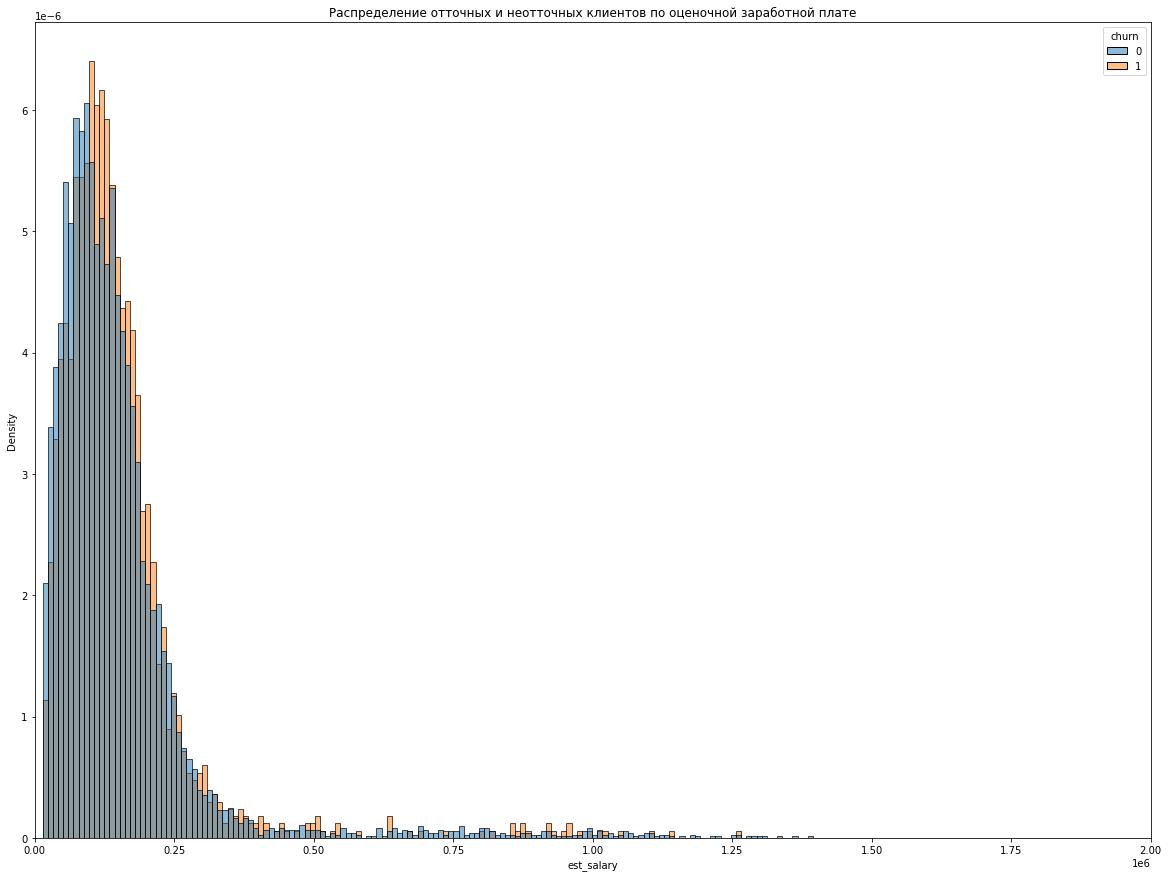

In [70]:
plt.figure(figsize=(20, 15))
sns.histplot(data=df, x='est_salary', hue='churn', stat='density', common_norm=False)
plt.xlim(0, 2000000)
plt.title("Распределение отточных и неотточных клиентов по оценочной заработной плате");

Распределение примерно одинаковое. Тем не менее, количество неотточных клиентов с оценочной заработной платой примерно до 100 тыс. рублей больше, чем отточных клиентов с такой же заработной платой. Количество отточных клиентов с заработной платой от 100 тыс. до 200 тыс. рублей больше, чем неотточных.

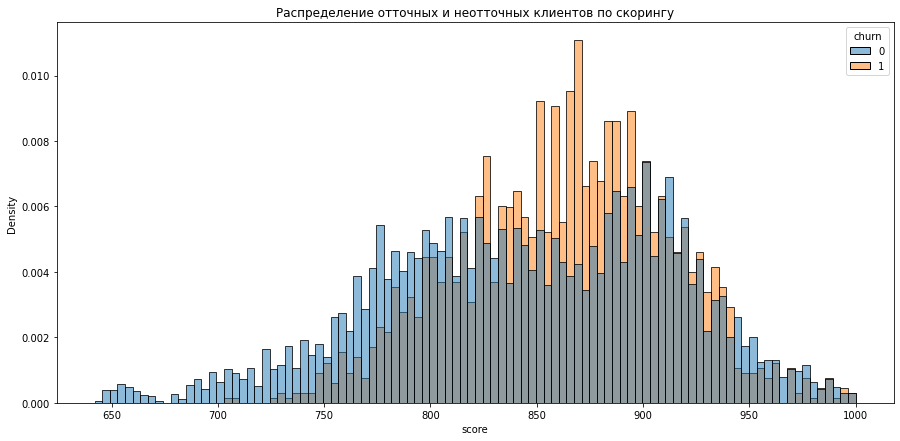

In [71]:
plt.figure(figsize=(15, 7)) 
sns.histplot(data=df, x='score', hue='churn', bins=100, stat='density', common_norm=False)
plt.title("Распределение отточных и неотточных клиентов по скорингу")
plt.show();

Наиболее отточными определяем клиентов со скорингом от 825 до 910, от 920 до 945. 
(дублирую, т.к. распределение отточных и неотточных клиентов по скорингу в данном разделе тоже должно быть)

<a id="раздел10"></a>

## Провести корреляционный анализ 

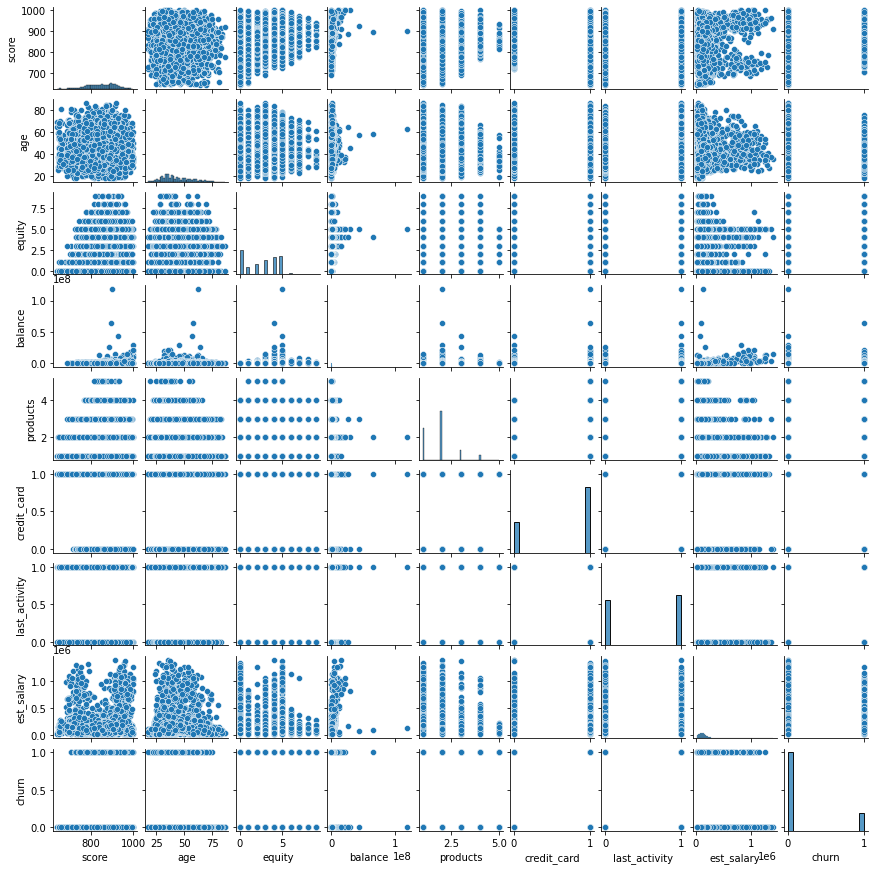

In [72]:
sns.pairplot(df[['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']])
plt.gcf().set_size_inches(12,12);

In [73]:
print(df['churn'].corr(df['score']))

0.10518355100604361


Коэффициент корреляции близок к 1, поэтому можем сказать, что наблюдается линейная взаимосвязь скоринга и отточности клиента

In [74]:
print(df['churn'].corr(df['age']))

-0.049881834776084405


Коэффициент корреляции, скорее всего, говорит об отсутствии взаимосвязи или о сложной нелинейной взаимосвязи.

In [75]:
print(df['churn'].corr(df['equity']))

0.2715390213251192


Коэффициент корреляции 0,2717 говорит о наличии слабой линейной взаимосвязи отточности и приблизительной оценки собственности

In [76]:
print(df['churn'].corr(df['products']))

0.3041049496162689


Коэффициент говорит о наличии слабой линейной взаимосвязи отточности и количества используемых продуктов

In [77]:
print(df['churn'].corr(df['balance']))

0.08498195805391993


Коэффициент корреляции 0,0007 говорит о сложной нелинейной взаимосвязи

In [78]:
print(df['churn'].corr(df['credit_card']))

-0.1309733747350014


Коэффициент корреляции говорит об обратной слабой взаимосвязи

In [79]:
print(df['churn'].corr(df['last_activity']))

0.17058092610885436


Коэффициент корреляции говорит о слабой взаимосвязи

In [80]:
print(df['churn'].corr(df['est_salary']))

-0.0003225158437630551


Коэффициент корреляции говорит о сложной нелинейной взаимосвязи

In [81]:
print(df['churn'].corr(df['gender_Ж']))

-0.1415420711850194


Коэффициент корреляции говорит об обратной слабой взаимосвязи

In [82]:
print(df['churn'].corr(df['gender_М']))

0.14154207118501935


Коэффициент корреляции говорит о слабой взаимосвязи

In [83]:
print(df['churn'].corr(df['Ростов']))

0.004094530334239148


Коэффициент корреляции говорит об отсутствии взаимосвязи

In [84]:
print(df['churn'].corr(df['Рыбинск']))

-0.02858523854290176


Коэффициент корреляции говорит об отсутствии взаимосвязи

In [85]:
print(df['churn'].corr(df['Ярославль']))

0.022811290444059926


Коэффициент корреляции говорит об отсутствии взаимосвязи

In [86]:
df

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,Ростов,Рыбинск,Ярославль,gender,city
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Ж,Рыбинск
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Ж,Рыбинск
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Ж,Рыбинск
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ж,Ярославль
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,М,Ярославль
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,27,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0,М,Рыбинск
9996,139170,894.0,46,0,NaN,1,1,0,196898.29,0,0,1,0,0,1,М,Ярославль
9997,115639,903.0,24,0,NaN,2,1,1,108905.09,0,0,1,0,0,1,М,Ярославль
9998,148700,777.0,68,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1,Ж,Ярославль


In [87]:
c_df = df.drop(columns=['gender', 'city'])

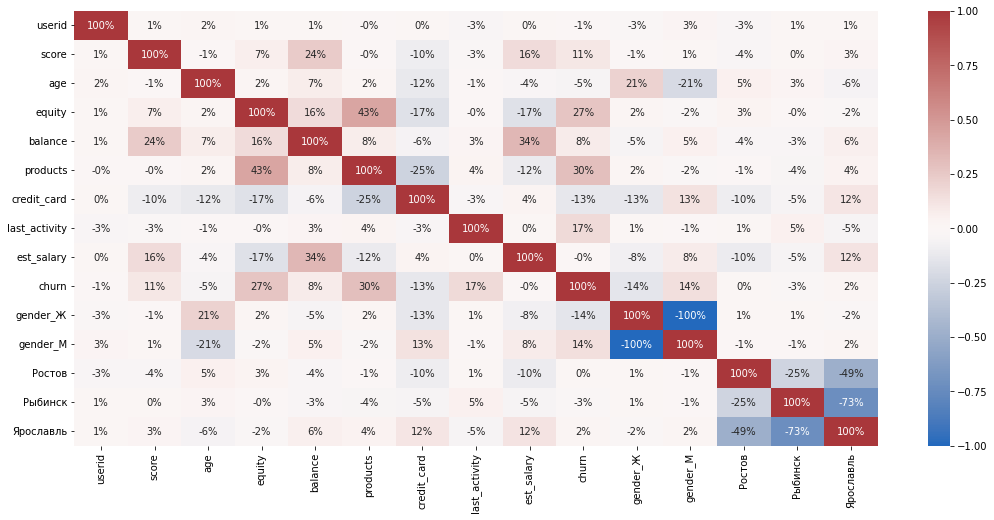

In [88]:
plt.figure(figsize=(18,8))
sns.heatmap(c_df.corr(), cmap= 'vlag', annot=True, fmt='.0%', center= 0);

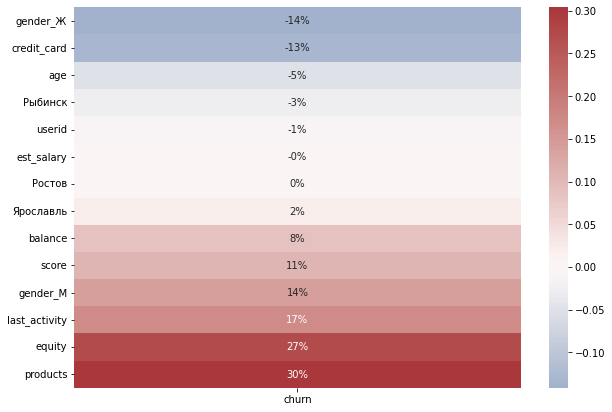

In [89]:
plt.figure(figsize=(10,7))
vlag = sns.color_palette("bwr")
sns.heatmap(c_df.corr().loc[:,['churn']].drop('churn').sort_values('churn'), cmap="vlag", annot=True, fmt='.0%', center=0);

На отточность клиента влияют такие показатели, как: количество используемых продуктов, приблизительная оценка собственности клиента, активность клиента в последнее время, гендерный фактор, баланс, скоринг, т.к. они больше 10%.

Скорее всего, клиенты активные уходят, чтобы попробовать другие продукты и приходят снова. Предложить новые продукты, снизив порог скоринга, т.к. скоринг отточных клиентов ниже, чем у неотточных клиентов. 

<a id="раздел11"></a>

## Выдвинуть и проверить статистические гипотезы

•	Сформулировать не менее 2 нулевых гипотез;   
•	Отслеживать применимость используемого стат.критерия к исследуемым данным;  
•	Выдвинуть гипотезу, исходя из сравнения типичных клиентов

Нулевая гипотеза: Между оценочной заработной платой отточных клиентов и неотточных клиентов нет значимой разницы.   
Альтернативная гипотеза: Между оценочной заработной платой отточных клиентов и неотточных клиентов есть значимая разница.


In [90]:
(
    c_df[['balance', 'est_salary']]
    .quantile([0.01, .5, .90, .99]) 
    .style.format("{:,.2f}")
)

,balance,est_salary
0.01,"25,258.31","20,442.47"
0.5,"527,542.75","120,104.47"
0.9,"1,464,708.21","242,960.78"
0.99,"4,827,422.84","888,881.46"


In [91]:
#очищаем даннеы от выбросов
c_df = c_df.query('balance <= 1464708.21 and est_salary <= 242960.78')

In [92]:
c_df_user_1 = c_df[c_df['churn']==1]
c_df_user_0 = c_df[c_df['churn']==0]

In [93]:
est_salary_0 = c_df_user_0['est_salary']

est_salary_1 = c_df_user_1['est_salary']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(est_salary_0, est_salary_1, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 1.6834268539741554e-10
Отвергаем нулевую гипотезу


In [94]:
est_salary_0 = c_df_user_0['est_salary']

est_salary_1 = c_df_user_1['est_salary']

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(est_salary_0, est_salary_1)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  3.7450556298697725e-11
Отвергаем нулевую гипотезу: разница статистически значима


t-критерию Стьюдента стоит доверять сильнее, когда в данных есть выбросы (оценочная заработная плата состоятельных клиентов), поэтому оценочная заработная плата отточных клиентов больше, чем у неотточных. 

* **z-тест: проверим находят ли статистические критерии разницу между выборками отточных и неотточных пользователей по городам**

Нулевая гипотеза: Между долями отточных и неотточных клиентов из Ярославля нет значимой разницы. Между долями отточных и неотточных клиентов из Рыбинска нет значимой разницы. Между долями отточных и неотточных клиентов из Ростова нет значимой разницы.  

Альтернаятивная гипотеза: Между долями отточных и неотточных клиентов из Ярославля есть значимая разница. Между долями отточных и неотточных клиентов из Рыбинска есть значимая разница. Между долями отточных и неотточных клиентов из Ростова есть значимая разница.

In [95]:
df_city_churn = df.pivot_table(index='city', columns='churn', values='userid', margins=True, aggfunc='nunique').sort_values(by=1, ascending=False).reset_index()
df_city_churn

churn,city,0,1,All
0,All,8056,1816,9872
1,Ярославль,4722,1117,5839
2,Рыбинск,2197,436,2633
3,Ростов,1137,263,1400


In [96]:
df_city_churn = df_city_churn.rename(columns = {0: 'churn_0', 1: 'churn_1'})
print(df_city_churn)

churn       city  churn_0  churn_1   All
0            All     8056     1816  9872
1      Ярославль     4722     1117  5839
2        Рыбинск     2197      436  2633
3         Ростов     1137      263  1400


In [97]:
df_churn_0_1 = df.groupby('churn').agg({'userid':'nunique'}).reset_index()

print(df_churn_0_1)

   churn  userid
0      0    8056
1      1    1816


In [98]:
df_city_churn_all = (df_churn_0_1.assign(idx=df_churn_0_1.groupby('churn').cumcount())
                 .pivot_table(index='idx', columns='churn',
                              values='userid', aggfunc='sum')).reset_index(drop=True)
df_city_churn_all = df_city_churn_all.rename(columns = {0: 'churn_0', 1: 'churn_1'})
df_city_churn_all['All'] = df_city_churn_all['churn_0']+df_city_churn_all['churn_1']
df_city_churn_all

churn,churn_0,churn_1,All
0,8056,1816,9872


In [99]:
alpha = 0.05  # критический уровень статистической значимости

def z_test(c_0, c_1, alpha):
    for n in df_city_churn.index:
        alpha = 0.05  # критический уровень статистической значимости
        p1 = df_city_churn[c_0][n] / df_city_churn_all[c_0]
        p2 = df_city_churn[c_1][n] / df_city_churn_all[c_1]
        p_combined = (df_city_churn[c_0][n] + df_city_churn[c_1][n]) / (df_city_churn_all[c_0] + df_city_churn_all[c_1])     
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/df_city_churn_all[c_0] + 1/df_city_churn_all[c_1]))
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(df_city_churn['city'][n], p_value))
        if p_value < alpha: 
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
            print()

z_test('churn_0', 'churn_1', 0.05)

All p-значение: [nan]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Ярославль p-значение: [0.02342184]
Отвергаем нулевую гипотезу: между долями есть значимая разница
Рыбинск p-значение: [0.00450894]
Отвергаем нулевую гипотезу: между долями есть значимая разница
Ростов p-значение: [0.68413719]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



По Ярославлю и Рыбинску значения меньше alpha, поэтому мы не можем отвергнуть нулевую гипотезу. У нас нет достаточных оснований утверждать, что между долями отточных и неотточных клиентов из Ярославля, Рыбинска нет значимой разницы. По Ростову значение больше 0.05, поэтому мы не можем отвергнуть нулевую гипотезу, нет оснований считать доли разными.

<a id="раздел12"></a>

## Подвести промежуточный итог 
Определить какие показатели стратегически влияют на отток (какие признаки стратегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком)

В Рыбинске и в Ярославле оценочная заработная плата отточных клиентов ниже, чем у неотточных, в Ростове оценочная заработная плата отточных клиентов выше, чем у неотточных.
Доля отточных клиентов с приблизительной оценкой собственности от 3 до 7 выше, чем доля неотточных.

Наиболее высокая доля отточных клиентов среди клиентов, которые пользуются 4 продуктами. Доля отточных клиентов больше доли неотточных среди клиентов, которые используют больше 2 продуктов.
Возрастную категорию отточных клиентов выбираем от 27 до 36 лет, также от 50 до 60 лет (включительно).
На отточность клиента влияют такие показатели, как: количество используемых продуктов, приблизительная оценка собственности клиента, активность клиента в последнее время, гендерный фактор, скоринг, т.к. они больше 10%.
Скорее всего, клиенты активные уходят, чтобы попробовать другие продукты и приходят снова. Предложить новые продукты, снизив порог скоринга, т.к. скоринг отточных клиентов ниже, чем у неотточных клиентов.

Оценочная заработная плата отточных клиентов больше, чем у неотточных. В связи с тем, что в данных оценочной заработной платы клиентов есть выбросы из-за состоятельных клиентов доверяем критерию t-критерию Стьюдента. Видимо, за счет того, что в Ростове оценочная заработная плата отточных клиентов выше, чем у неотточных.

|Показатель |Сравнение портретов/гипотезы|Корреляции|Распределения в разрезе оттока|
| :--- | :---: | :---: | :--- |
|score      |у отточных на 2,1 % больше, чем у неотточных|слабая 11%| от 825 до 910, от 920 до 945 |
|age        |отточные на 3,6% младше неотточных|несущественная -5%|25-35, 50-60|
|equity     |на 58,4% у отточных выше, чем у неотточных|есть 27%|от 3|
|balance    |на 53,9% у отточных больше, чем у неотточных |слабая 8%|от 1,1 до 4 млн. руб. |
|products   |количество используемых продуктов у отточных на 35,4% больше, чем у неотточных |есть 30%|от 2 продуктов                       |
|credit_card| есть вероятность, что у отточных есть кредитная карта |обратная связь -13%| без карты |
|last_activity| есть вероятность, что отточные активны|слабая 17%| активные |
|est_salary |средняя у отточных на 0,07% ниже, а медианная на 5,3% выше, чем у неотточных|нет связи -0% | от 100 до 200 тыс. руб.|
|gender     |есть вероятность, что отточные мужского пола|есть 14%|мужчины|

<a id="раздел13"></a>

## Сегментация на основе стратегических показателей 
Выделить не мелкие, но компактные высокоотточные сегменты, посчитать размер и отток сегментов, приоритизировать их.

In [100]:
df_s1 =  df.query('25 <= age <= 35 and 3 <= equity <= 5 and last_activity == 1').agg({"churn":"mean", "userid":"count", "age": "count", "equity": "count", "last_activity": "count"})
print(df_s1['userid'])

893.0


In [101]:
df_s2 = df.query('balance > 1100000 and 50 <= age <= 60').agg({"churn":"mean", "userid":"count", "balance": "count", "age": "count"})
print(df_s2['userid'])

395.0


In [102]:
df_s3 = df.query('products >= 3 and 200000 >= est_salary >= 100000').agg({"churn":"mean", "userid":"count", "products": "count", "est_salary": "count"})
print(df_s3['userid'])

617.0


Исходя из того, что средняя доля отточных клиентов 18,3%, выбираем в качестве приоритетных сегменты по критериям, где доля отточности в два раза выше: 
1) возрастной категории от 25 до 35 с оценкой собственности от 3 до 5, активных;  
2) балансом от 1,1 млн. руб. и возрастной категории от 50 до 60 лет;  
3) использующих 3 и более продуктов, зарплатой от 100 тыс. до 200 тыс. рублей

In [103]:
qrys = (
    '25 <= age <= 35 and 3 <= equity <= 5 and last_activity == 1',
    'balance > 1100000 and 50 <= age <= 60',
    'products >= 3 and 200000 >= est_salary >= 100000',
    
)

df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

ok = True
if len(qrys) != 3:
    ok = False
    print('\033[93m\033[1mРезультаты некорректны, нужно 3 лучших сегмента\033[0m')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    ok = False
    print('\033[93m\033[1mНужно изменить сегменты: присутствуют недостаточно отточные\033[0m')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов не высокоотточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    ok = False
    print('\033[93m\033[1mНужно изменить сегменты: присутствуют слишком мелкие сегменты\033[0m')
    
if all_catched.shape[0] > 5000:
    ok = False
    print("\033[93m\033[1mОтдел маркетинга не сможет обработать такое количество клиентов\033[0m")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"\033[93m\033[1mВ сегменты попало недостаточное число отточных: {text_churn}\033[0m")
elif ok:
    if 1/2 < share_catched < 2/3:
        print(f"Хороший результат, в сегменты попало: {text_churn}")
    elif share_catched >= 2/3:
        print(f"Прекрасный результат, в сегменты попало: {text_churn}")
    else:
        print(f"В сегменты попало: {text_churn}")
else:
    print(f"В сегменты попало: {text_churn}")

,Отток,Размер
25 <= age <= 35 and 3 <= equity <= 5 and last_activity == 1,46.8%,893
balance > 1100000 and 50 <= age <= 60,50.4%,395
products >= 3 and 200000 >= est_salary >= 100000,45.7%,617


В сегменты попало: 806/1816 = 44.4%


<a id="раздел14"></a>

## Подготовить выводы и рекомендации для заказчика
Сформулировать рекомендации по приоритетным сегментам.

Для 1 сегмента (возрастной категории от 25 до 35 с оценкой собственности от 3 до 5, активных) можно предложить бонусную программу для постоянных клиентов, льготные тарифы по межбанковским переводам и кредитные продукты.

Для 2 сегмента (балансом от 1,1 млн. руб. и возрастной категории от 50 до 60 лет) можно предложить открытие дополнительного счета на льготных условиях под разные цели (например, накопительный, сберегательный счет), специальные условия по увеличению лимита банковских переводов и снятию наличных денег. 

Для сегмента 3 (использующих 3 и более продуктов, зарплатой от 100 тыс. до 200 тыс. рублей) можно предложить автокрелит, ипотечное кредитование.

<a id="раздел15"></a>

## Презентация
<a href='https://disk.yandex.ru/d/dkSUmOwMlEcNBA'> ссылка на презентацию </a>

<a id="раздел16"></a>

## Дашборд указанием количества клиентов в зависимости от числа используемых продуктов и уровня оттока среди владельцев данного числа продуктов, также с рапределением по городам
<a href='https://public.tableau.com/authoring/2_16928051497470/Dashboard2#1'> ссылка на дашборд </a>

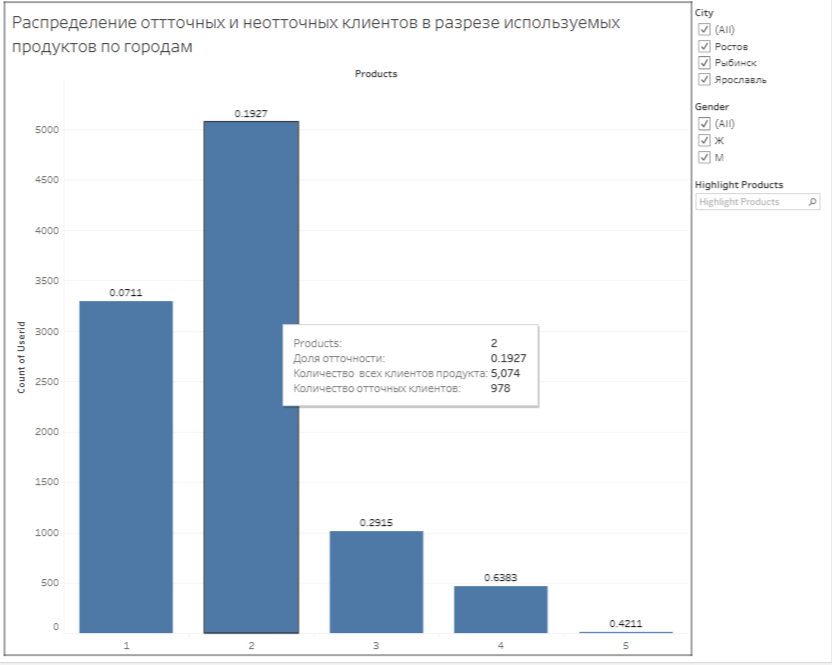